importing dataset


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Airline_Delay_Cause.csv.zip')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


analysing data and handling missing value

In [ ]:
df.shape

(171666, 21)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,240
arr_del15,443
carrier_ct,240
weather_ct,240


handling missing value


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [ ]:
df = df.drop(columns=['security_delay'])

ploting graph to understand data


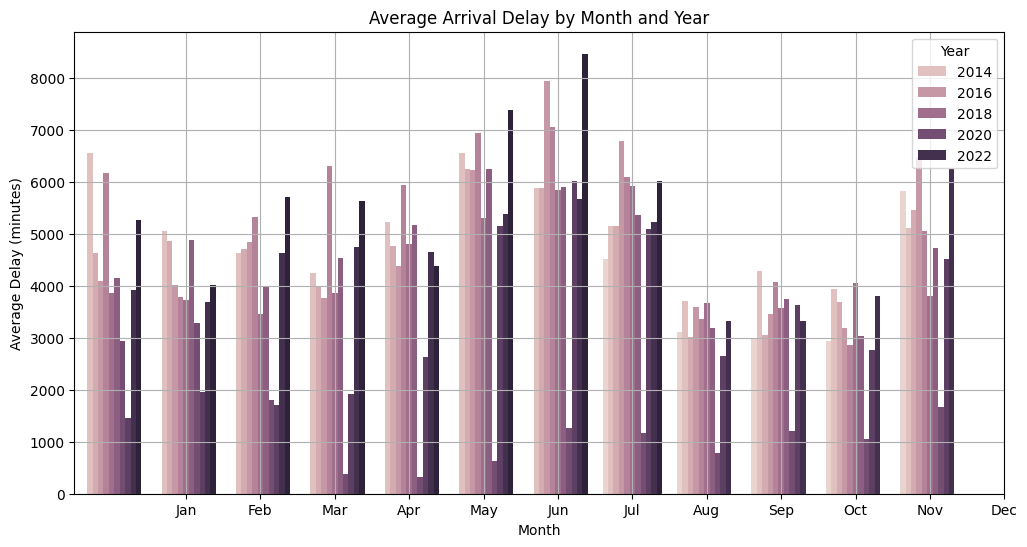

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'arr_delay' is the column representing delay
# and 'year' and 'month' are columns in your DataFrame
df_delay_by_month_year = df.groupby(['year', 'month'])['arr_delay'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='month', y='arr_delay', hue='year', data=df_delay_by_month_year)
plt.title('Average Arrival Delay by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])# Set x-axis ticks to represent months
plt.grid(True)
plt.legend(title='Year')  # Add a legend to differentiate years
plt.show()

understanding delay cause

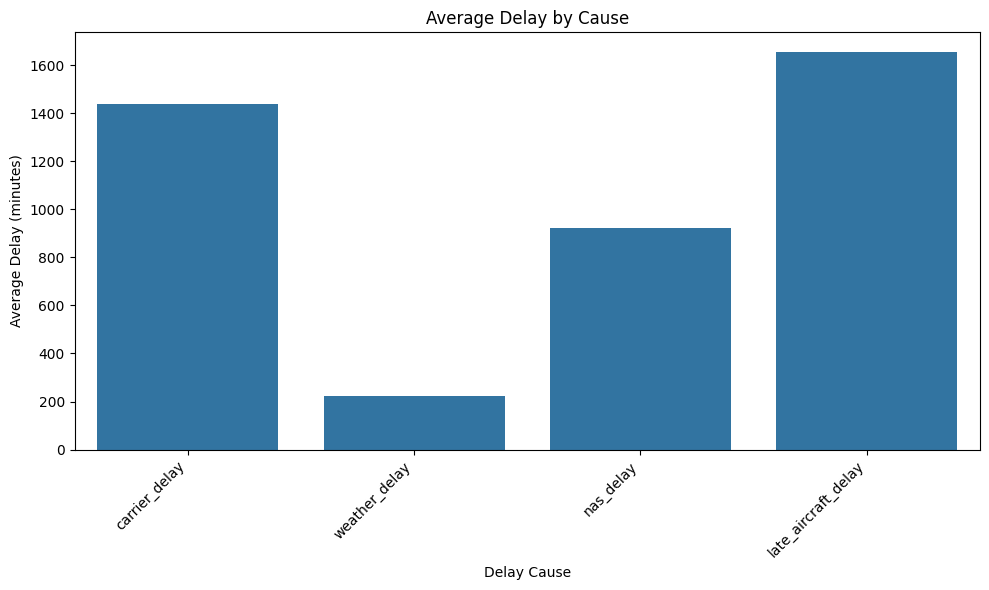

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame has columns for each delay cause
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
#removed security_delay as per your previous operations
# Calculate the average delay for each cause
avg_delays = df[delay_causes].mean()

# Create a bar plot to visualize the average delays
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_delays.index, y=avg_delays.values)
plt.title('Average Delay by Cause')
plt.xlabel('Delay Cause')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

feature selection

Feature Importances (Random Forest):
carrier_delay          0.481799
nas_delay              0.256489
late_aircraft_delay    0.192422
weather_delay          0.059121
year                   0.006858
month                  0.003312
dtype: float64


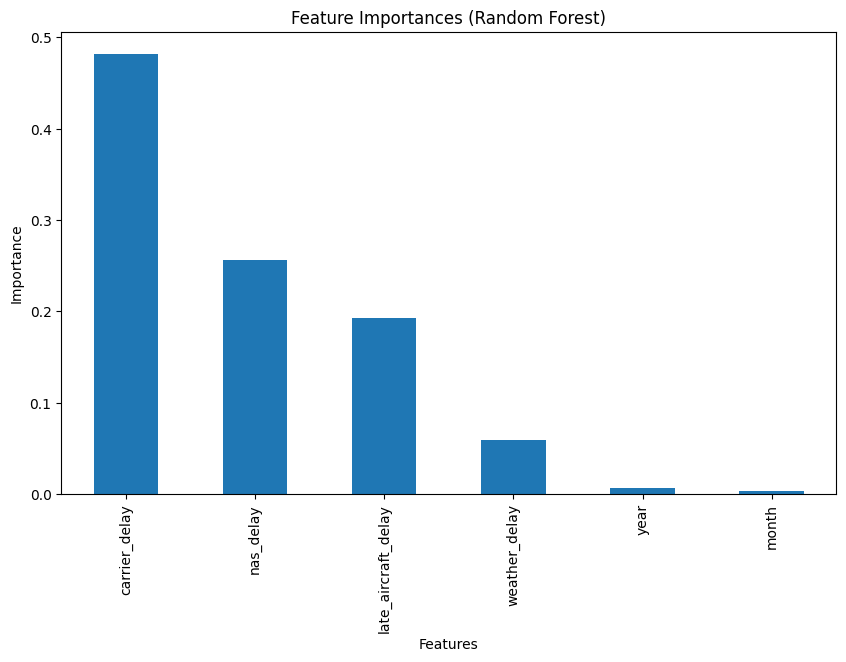


Mutual Information Scores:
carrier_delay          0.115664
nas_delay              0.086220
late_aircraft_delay    0.084362
weather_delay          0.034744
year                   0.011439
month                  0.004328
dtype: float64


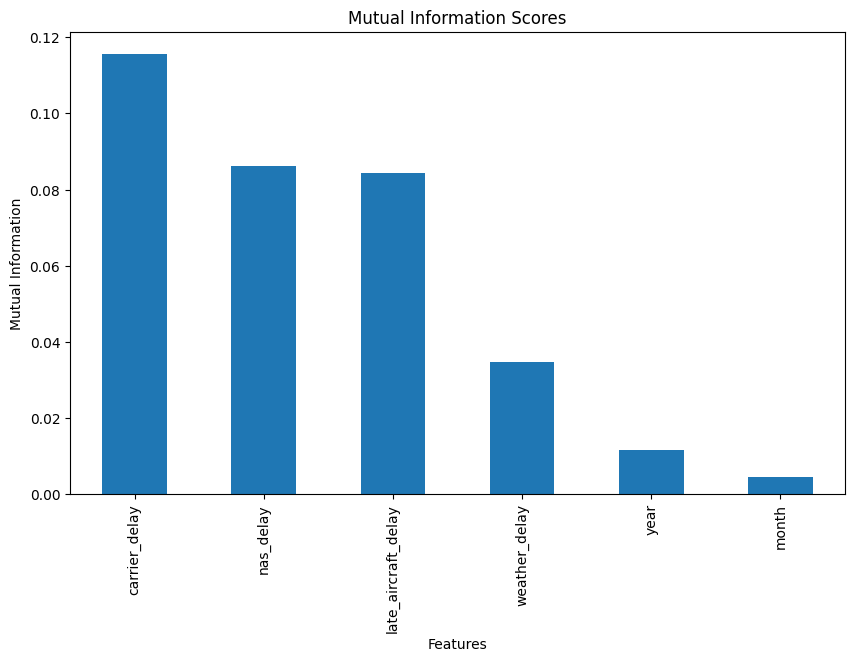


Selected Features:
['year', 'carrier_delay', 'nas_delay', 'late_aircraft_delay', 'weather_delay']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# 1. Prepare the data:
df['is_delayed'] = (df['arr_delay'] > 15).astype(int)
features = ['year', 'month', 'carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
X = df[features]
y = df['is_delayed']

# 2. Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% of data for testing, 80% for training
# random_state=42 ensures consistent splitting for reproducibility

# 3. Feature Selection using Random Forest:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=features)

# Print and plot feature importances
print("Feature Importances (Random Forest):")
print(feature_importances.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# 4. Feature Selection using Mutual Information:
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto')
mi_scores = pd.Series(mi_scores, index=features)

# Print and plot mutual information scores
print("\nMutual Information Scores:")
print(mi_scores.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
mi_scores.sort_values(ascending=False).plot(kind='bar')
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()

# 5. Select top features:
top_rf_features = feature_importances.sort_values(ascending=False).head(5).index.tolist()
top_mi_features = mi_scores.sort_values(ascending=False).head(5).index.tolist()
selected_features = list(set(top_rf_features + top_mi_features))

print("\nSelected Features:")
print(selected_features)

traning and testing data

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score


# 1. Create the 'is_delayed' column:
df['is_delayed'] = (df['arr_delay'] > 15).astype(int)

# 2. Define features and target variables:
features = ['year', 'month', 'carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
target_classification = 'is_delayed'
target_regression = 'arr_delay'

# 3. Split data into training and testing sets:
X = df[features]
y_classification = df[target_classification]
y_regression = df[target_regression]
X_train, X_test, y_train_classification, y_test_classification, y_train_regression, y_test_regression = train_test_split(
    X, y_classification, y_regression, test_size=0.2, random_state=42
)

# 4. Train the classification model:
classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train, y_train_classification)

# 5. Train the regression model:
regression_model = RandomForestRegressor(random_state=42)
regression_model.fit(X_train, y_train_regression)

# 6. Make predictions:
classification_predictions = classification_model.predict(X_test)
regression_predictions = regression_model.predict(X_test)

# 7. Evaluate the classification model:
accuracy = accuracy_score(y_test_classification, classification_predictions)
print(f"Classification Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_classification, classification_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classification, classification_predictions))

# 8. Evaluate the regression model (only for predicted delays):
delayed_indices = classification_predictions == 1
mse = mean_squared_error(y_test_regression[delayed_indices], regression_predictions[delayed_indices])
r2 = r2_score(y_test_regression[delayed_indices], regression_predictions[delayed_indices])
print(f"\nRegression Mean Squared Error (for predicted delays): {mse:.2f}")
print(f"Regression R-squared (for predicted delays): {r2:.2f}")

# 9. Check predictions on a sample of the test data:
sample_data = X_test.sample(10)
sample_classification_predictions = classification_model.predict(sample_data)
sample_regression_predictions = regression_model.predict(sample_data)

print("\nSample Predictions:")
print(sample_data)
print(f"Classification Predictions: {sample_classification_predictions}")
print(f"Regression Predictions (if delayed): {sample_regression_predictions}")

Classification Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1396
           1       1.00      1.00      1.00     32849

    accuracy                           1.00     34245
   macro avg       1.00      1.00      1.00     34245
weighted avg       1.00      1.00      1.00     34245


Confusion Matrix:
[[ 1383    13]
 [   11 32838]]

Regression Mean Squared Error (for predicted delays): 837481.09
Regression R-squared (for predicted delays): 1.00

Sample Predictions:
        year  month  carrier_delay  weather_delay  nas_delay  \
127975  2016     10           38.0            0.0       41.0   
99495   2018      8         3596.0          596.0     1196.0   
128858  2016      9         1126.0           35.0      192.0   
170783  2013      8         4576.0          799.0     3428.0   
48869   2021      3           65.0           39.0       97.0   
85173   2019      5         1702.0          135.0

saving model

In [ ]:
import joblib



# Save the classification model:
joblib.dump(classification_model, 'classification_model.pkl')

# Save the regression model:
joblib.dump(regression_model, 'regression_model.pkl')

print("Models saved successfully!")

NameError: name 'classification_model' is not defined